In [1]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.feature import hog

In [2]:
path_dataset = '/home/hyunjoon/dataset/stl-10-biased'
list_fn = [l for l in os.listdir(path_dataset) if l.endswith('.jpg')]

In [3]:
def color_feature(img):
    if img.dtype == 'uint8':
        img = img.astype(float) / 255.0
    else:
        img = img.astype(float)
    r_img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)
    r2 = cv2.resize(img**2, (8, 8), interpolation=cv2.INTER_AREA)
    r2 -= r_img**2
    r2 = np.sqrt(np.maximum(r2, 0))
    r_img = np.concatenate([r_img, 1.0 - r_img, r2, 1.0 - r2], axis=2).ravel()
    r_img = r_img / np.sqrt(np.sum(r_img**2))
    return r_img

In [4]:
all_imgs = [cv2.imread(os.path.join(path_dataset, fn)) for fn in list_fn]

In [5]:
all_hog = [hog(img, pixels_per_cell=(4, 4), multichannel=True) for img in all_imgs]

In [5]:
all_clr = [color_feature(img) for img in all_imgs]

In [11]:
removed_idx = []
fidx = np.random.permutation(np.arange(len(all_imgs)))
# hogs = np.array(all_hog)[fidx]
clrs = np.array(all_clr)
kept = []
remaining = fidx.copy()

for ii in range(len(all_imgs)):
    if len(remaining) == 0:
        break
    pidx = remaining[0]
    kept.append(pidx)
    if len(remaining) == 1:
        break
    
    p_clr = clrs[pidx]
    sims_clr = np.sum(clrs[remaining] * np.reshape(p_clr, (1, -1)), axis=1)**100
    
#     p_hog = hogs[pidx]
#     sims_hog = np.sum(hogs[remaining] * np.reshape(p_hog, (1, -1)), axis=1) / 36
    
    ridx = np.where((sims_clr) < 0.5)[0]
    remaining = remaining[ridx]
    
    if ii % 1000 == 0:
        print(ii)
        
# #     to_keep
# for ii in range(len(all_imgs) - 1):
#     if ii in removed_idx:
#         continue
#     p_hog = hogs[ii]
#     sims_hog = np.sum(hogs[ii+1:] * np.reshape(p_hog, (1, -1)), axis=1) / 36
#     p_clr = clrs[ii]
#     sims_clr = np.sum(clrs[ii+1:] * np.reshape(p_clr, (1, -1)), axis=1)**100
#     ridx = np.where(sims_hog * sims_clr > 0.4)[0] + ii + 1
# #     ridx = np.where(sims_clr > 0.5)[0] + ii + 1
#     removed_idx += ridx.tolist()
    
#     if ii % 1000 == 0:
#         print(ii)

0
1000
2000
3000
4000
5000
6000
7000


In [12]:
len(list_fn)

55000

In [13]:
# to_remove = fidx[np.unique(removed_idx)]
# kept = np.setdiff1d(fidx, to_remove)
kept = [list_fn[ii] for ii in kept]

In [14]:
classes = np.zeros((10), dtype=np.int32)
with open('train_kept_color.txt', 'w') as fh:
    for fn in kept:
        cid = int(os.path.splitext(fn)[0].split('_')[-1])
        classes[cid] += 1
        fh.write('{} {}\n'.format(fn, cid))

In [15]:
classes

array([2696,  494,  498,  482,  464,  495,  498,  494,  484,  497],
      dtype=int32)

In [32]:
ridx = np.random.choice(np.arange(len(all_imgs)), 10, replace=False)
for ii in ridx:
    p_hog = all_hog[ii]
    p_clr = all_clr[ii]
    sims_hog = np.array([np.sum(p_hog * h) / 36 for h in all_hog])
    sims_clr = np.array([np.sum(p_clr * h) for h in all_clr])**100
    print('{}: {}'.format(list_fn[ii], len(np.where(np.array(sims_clr) > 0.5)[0])))

33497_000.jpg: 17
07820_000.jpg: 62
16167_000.jpg: 73
34123_000.jpg: 18
17912_000.jpg: 42
43062_000.jpg: 16
24629_000.jpg: 52
13648_000.jpg: 19
15803_000.jpg: 30
31933_000.jpg: 51


In [85]:
sims_clr[:100]

array([0.8207572 , 0.95073425, 0.93468715, 0.90771803, 0.90306581,
       0.93291645, 0.91059   , 0.9298446 , 0.85039335, 0.91614042,
       0.8903972 , 0.94685225, 0.95883694, 0.93191028, 0.90658547,
       0.90885525, 0.92480158, 0.93709488, 0.92549832, 0.96027172,
       0.96671547, 0.94705523, 0.9207928 , 0.90880154, 0.93894007,
       0.93333179, 0.8376831 , 0.91403106, 0.8943532 , 0.92266806,
       0.86771452, 0.9315809 , 0.89831297, 0.95570216, 0.94742544,
       0.85428574, 0.87370099, 0.92291836, 0.90290039, 0.92137095,
       0.90914571, 0.86666649, 0.87903944, 0.93658476, 0.84451109,
       0.89691268, 0.94142185, 0.93486684, 0.90700862, 0.93138456,
       0.90645951, 0.96142548, 0.94329031, 0.94712677, 0.96691309,
       0.92985389, 0.85183328, 0.84724915, 0.87058205, 0.87983839,
       0.93656386, 0.94134218, 0.92207531, 0.73818724, 0.94684757,
       0.79029865, 0.84014537, 0.89290319, 0.8412161 , 0.92653423,
       0.89778104, 0.88315932, 0.95748672, 0.94075107, 0.90173

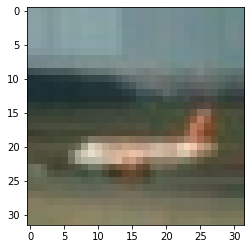

In [97]:
plt.imshow(cv2.imread(os.path.join(path_dataset, '20582_000.jpg')))

In [80]:
all_hog[0].shape

(2916,)

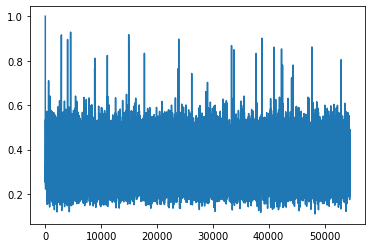

In [22]:
plt.plot(sims_hog)